In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [9]:
data = pd.read_csv('E:/swimdata.csv', sep=',', names=['ax', 'ay', 'az', 'gx', 'gy', 'gz'])
data.tail(), len(data)
# data['t'] = data['t'] - data['t'][0]
data.to_csv('data/swimdata.csv', index=False)

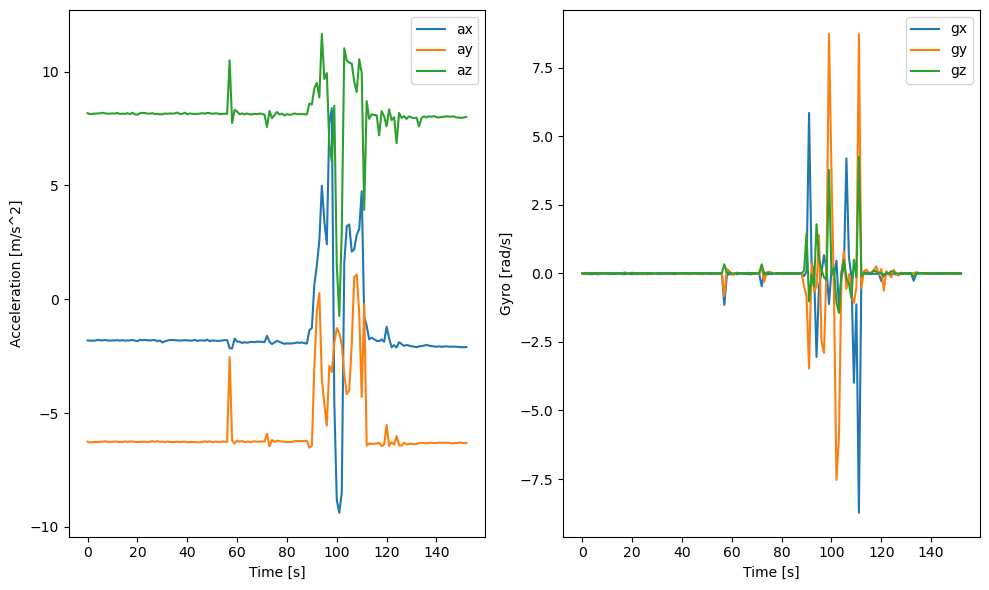

In [10]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.plot(data["ax"], label='ax')
plt.plot(data["ay"], label='ay')
plt.plot(data["az"], label='az')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s^2]')
plt.legend()

plt.subplot(122)
plt.plot(data["gx"], label='gx')
plt.plot(data["gy"], label='gy')
plt.plot(data["gz"], label='gz')
plt.xlabel('Time [s]')
plt.ylabel('Gyro [rad/s]')
plt.legend()

plt.tight_layout()

In [11]:
px.line(data, y=['ax', 'ay', 'az'], title='Acceleration vs Time').show()

In [8]:
px.line(data, y='ax', title='Acceleration vs Time').show()
px.line(data, y='ay', title='Acceleration vs Time').show()
px.line(data, y='az', title='Acceleration vs Time').show()

In [10]:
import cv2

# Function to extract frames
def FrameCapture(path):

    # Path to video file
    vidObj = cv2.VideoCapture(path)

    # Used as counter variable
    count = 0

    # checks whether frames were extracted
    success = 1

    while success:

        # vidObj object calls read
        # function extract frames
        success, image = vidObj.read()

        # Saves the frames with frame-count
        cv2.imwrite("frames/frame%d.jpg" % count, image)

        count += 1

In [11]:
FrameCapture('video/swimtest3.mp4')

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:929: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [7]:
import glob
import pandas as pd
import os

frames = glob.glob('frames/*.jpg')
frames.sort(key=lambda x: int(os.path.splitext(os.path.basename(x))[0].replace('frame', '')))
videodata = pd.DataFrame({'frame': frames})

In [45]:
(len(data) - len(videodata)) / 2

22.0

In [8]:
# TODO: The data are different lengths, but maybe we can try and align them somehow
# The video data is a subset of the sensor data, so we can try and join

data["id"] = np.arange(len(data))

offset = 22
videodata["id"] = np.linspace(offset, len(videodata) - 1 + offset, len(videodata), dtype=int)

videodata
merged = pd.merge(data, videodata, on='id', how='outer')
merged.to_csv("data/merged_data.csv", index=False)

In [9]:
merged.head(23)

,t,ax,ay,az,gx,gy,gz,mx,my,mz,qi,qj,qk,qreal,id,frame
0,0.000000,5.261719,5.996094,-5.750000,0.052734,-0.349609,0.708984,-14.5000,-13.3750,21.8125,0.006104,-0.009644,0.013184,0.999878,0,NaN
1,0.131000,5.222656,5.882813,-6.093750,0.037109,-0.244141,0.222656,-14.5000,-11.5625,24.4375,0.013977,-0.026917,0.031494,0.999023,1,NaN
2,0.231002,5.070313,5.804688,-6.242188,-0.431641,-0.310547,-0.115234,-13.1875,-12.8750,24.0000,0.075134,-0.909851,-0.271362,0.304810,2,NaN
3,0.340999,4.687500,6.035156,-6.175781,0.193359,-0.449219,0.195313,-11.4375,-11.3750,23.0625,0.071167,-0.919250,-0.266479,0.280823,3,NaN
4,0.451000,3.578125,6.761719,-6.285156,-0.548828,-0.796875,0.326172,-6.7500,-17.3750,24.6250,0.032288,-0.919312,-0.308594,0.242065,4,NaN
5,0.549999,4.765625,6.570313,-5.441406,0.787109,-0.378906,0.320313,-5.8125,-23.1875,16.9375,0.514038,0.737366,0.437927,0.016235,5,NaN
6,0.670002,4.535156,6.378906,-6.558594,0.738281,-0.316406,0.589844,-5.7500,-18.8125,22.8750,0.780457,0.493958,0.358582,0.135437,6,NaN
7,0.785999,4.496094,4.003906,-7.433594,1.966797,-0.283203,-0.433594,-2.4375,-10.5625,25.8125,0.726196,0.610474,0.313538,0.040039,7,NaN
8,0.870002,3.460938,4.769531,-8.351563,-0.771484,-0.712891,0.291016,-1.3750,-7.6250,27.1250,0.743958,0.598694,0.290527,0.061218,8,NaN
9,0.960002,3.003906,4.503906,-8.550781,0.556641,-0.880859,0.466797,3.3750,-7.4375,27.8750,0.754883,0.593262,0.273560,0.057983,9,NaN


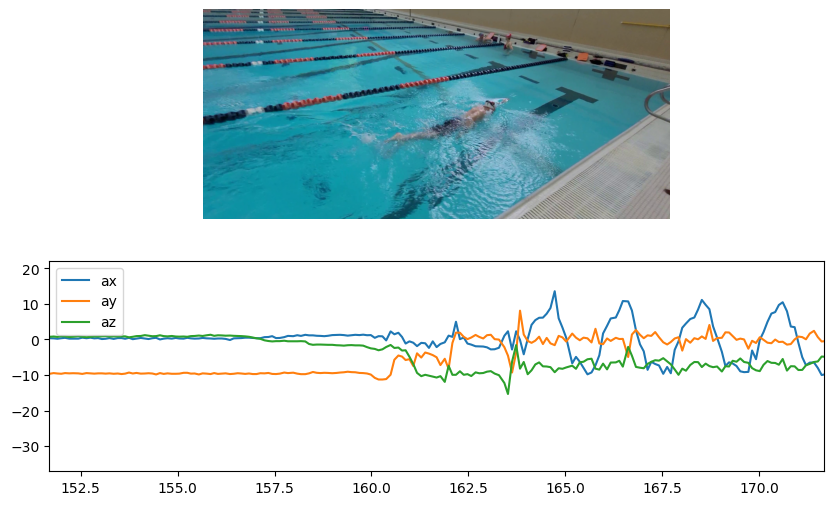

In [11]:
import matplotlib.image as mpimg

plt.figure(figsize=(10, 6))

index = 1600  # 1300 is push off, 1600 might be push off?
spread = 10

plt.subplot(2,1,1)
img = mpimg.imread(merged['frame'][index])
plt.imshow(img)
plt.axis('off')

plt.subplot(2,1,2)
plt.plot(merged['t'], merged['ax'], label='ax')
plt.plot(merged['t'], merged['ay'], label='ay')
plt.plot(merged['t'], merged['az'], label='az')
plt.legend()
plt.xlim(merged['t'][index] - spread, merged['t'][index] + spread)
plt.show()